# Statistics for Machine Learning (7-Day Mini-Course)

---

## Lesson 1: Statistics and Machine Learning

Five reasons why a machine learning practitioner have to understand statistics.

### 1. Statistics in Data Preparation

Several good techniques:
- Outliers detections
- Missing value imputation
- Data sampling
- Data scaling
- Variable encoding

You have to know data distributions, data visualization, and descriptive statistics.

### Statistics in Model Evaluation

Techniques:
- Data sampling
- Data resampling
- Experimental design.

Resampling technique like k-fold cross-validation will be beneficial for us to understand.

### Statistics in Model Selection

Techniques:
- Checking for a signification difference between results.
- Quantifying the expected variability of the skill of the model in practice.

Statistical hypothesis might be usefull.

### Statistics in Model Presentation

Techniques:
- Summarizing the expected skill of the model on average.
- Quantifying the expected variability of the skill of the model in practice.

Confidence interval might be usefull.

### Statistics in Prediction

Techniques:
- Quantifying the expected variability for the prediction.

Prediction intervals might be usefull.

---

## Lesson 02: Introduction to Statistics

Two types of statistics:
- Descriptive Statistics: Summarizing data
- Inferential Statistics: Create conclusion with samples.

Methods for Descriptive Statistics:
- Mean
- Median
- Standard Deviation

Methods for Inferential Statistics:
- Confidence Interval
- Prediction Interval
- Hypothesis Testing

---

## Lesson 03: Gaussian Distribution and Descriptive Statistics

Two parameters of Gaussian Distribution:
- Mean. The central tendency.
- Variance. The average difference from the mean.

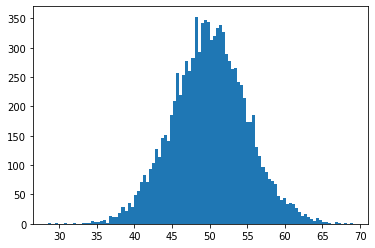

In [1]:
import numpy as np
import matplotlib.pyplot as plt

normal = np.random.normal(50, 5, 10000)
plt.hist(normal, bins=100);

In [2]:
print(f"The mean of normal distribution: {normal.mean():.2f}")
print(f"The variance of normal distribution: {normal.var():.2f}")
print(f"The standard deviation of normal distribution: {normal.std():.2f}")

The mean of normal distribution: 49.99
The variance of normal distribution: 24.41
The standard deviation of normal distribution: 4.94


---

## Lesson 04: Correlation Between Variables

Use: to understand about the relationship between two variables.

- Positive Correlation: Change in the same direction.
- Neutral Correlation: No relationship.
- Negative Correlation: Change in the opposite direction.



The model performance can be impacted by the multicollinearity, which means that certain variables have relationship and not independent.

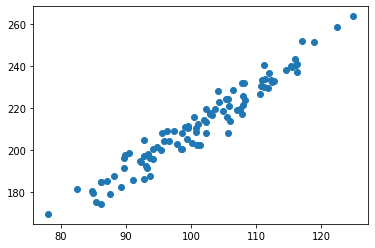

In [3]:
normal = np.random.normal(100, 10, size=100)
x = normal + np.random.normal(0, 2, size=100)
y = 2 * x + 10 + np.random.normal(0, 5, size=100)
plt.scatter(x, y)

In [4]:
from scipy.stats import pearsonr
corr, p = pearsonr(x, y)
print(f"The correlation coefficient of x and y: {corr:.2f}")

The correlation coefficient of x and y: 0.97


---

## Lesson 05: Statistical Hypothesis Tests

${H_0}$: Default hypothesis, test is hold.
${H_1}$: Test does not hold, reject the default hypothesis.

The p-value is the probability of observing the data, given the null hypothesis is true.

Small p-value means that we are unlikely to observed the data with our null hypothesis is true, then we shall reject the null hypothesis.

__Performing t-test__

In [14]:
from scipy.stats import ttest_ind
data1 = 21 * np.random.randn(10000) + 14
data2 = 20 * np.random.randn(10000) + 10
stat, p = ttest_ind(data1, data2)
print(f"Statistics={stat:.3f}, p={p:.3f}")

Statistics=13.184, p=0.000


In [15]:
alpha = 0.05
if p < alpha:
    print('Reject the null hypothesis, different distribution')
else:
    print('Accept the null hypothesis, same distribution')

Reject the null hypothesis, different distribution


In [16]:
import seaborn as sns

In [18]:
sampled1 = np.random.choice(data1, 100)
sampled2 = np.random.choice(data2, 100)

In [19]:
bootstrap_replicates = np.empty((10000, 2))
for i in range(10000):
    temp1 = np.random.choice(sampled1, size=sampled1.shape[0])
    temp2 = np.random.choice(sampled2, size=sampled2.shape[0])
    bootstrap_replicates[i] = [temp1.mean(), temp2.mean()]

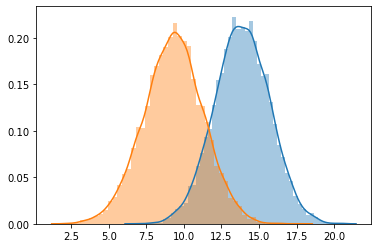

In [20]:
sns.distplot(bootstrap_replicates[:, 0])
sns.distplot(bootstrap_replicates[:, 1])

In [24]:
print(bootstrap_replicates.min(axis=0))
print(bootstrap_replicates.max(axis=0))

[6.99415535 2.17416804]
[20.53968614 17.57196121]


In [49]:
bins1 = np.round(np.arange(np.floor(bootstrap_replicates[:, 0].min()), np.ceil(bootstrap_replicates[:, 0].max()), 0.1), 1)
bins2 = np.round(np.arange(np.floor(bootstrap_replicates[:, 1].min()), np.ceil(bootstrap_replicates[:, 1].max()), 0.1), 1)

In [50]:
binned1 = np.digitize(bootstrap_replicates[:, 0], bins1)
binned2 = np.digitize(bootstrap_replicates[:, 1], bins2)

In [51]:
same = np.isin(bins1, bins2)

In [61]:
intersect_bins = bins1[same]

---

## Lesson 03: Estimation Statistics

Three main classes of estimation statistics:
- Effect Size: Methods for quantifying the size of an effect given a treatment of intervention.
- Interval Estimation: Methods for quantifying the amount of uncertainty in a value.
- Meta-Analysis: Methods for quantifying the findings across multiple similar studies.

Three main types of intervals:
- Tolerance Interval: The bounds or coverage of a proportion of a distribution with a specific level of confidence.
- Confidence Interval: The bounds on the estimate of a population parameter.
- Prediction Interval: The bounds on a single observation.

Simple way to calculate confidence interval is by using binomial proportion confidence interval. It takes the number of successes, total number of trials, and the significance level.

The example below demonstrates this function in a hypothetical case where a model made 88 correct predictions out of a dataset with 100 instances and we are interested in the 95% confidence interval (provided to the function as a significance of 0.05).

In [65]:
from statsmodels.stats.proportion import proportion_confint
lower, upper = proportion_confint(88, 100, 0.05)
print(f"lower={lower:.3f}, upper={upper:.3f}")

lower=0.816, upper=0.944


---

## Lesson 07: Nonparametric Statistics

We can use nonparameteric statistical methods, if we get our data not from a gaussian distribution.

Data in which the distribution is unknown or cannot be easily identified is called nonparametric.

Another word for non-parametric data is distribution-free data.

Before performing non-parametric statistical methods, we have to convert our data into ranking format. Which means:
- Sort all data in the sample in ascending order.
- Assign an integer rank for 1 to N for each unique value in the data sample.

Common non-parametric statistical method for checking the difference between two samples is Mann-Whitney U test. This is a non-parametric equivalent of t-test.

In [70]:
from scipy.stats import mannwhitneyu
data1 = 50 + (np.random.rand(100) * 10)
data2 = 51 + (np.random.rand(100) * 10)

In [71]:
stat, p = mannwhitneyu(data1, data2)
print(f"Statistic={stat:.3f}, P-value={p:.3f}")

Statistic=4017.000, P-value=0.008
